<a href="https://colab.research.google.com/github/atlavijayakumari/TCS-Stock-Price-Prediction-task/blob/main/TCS_Stock_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1:-Data collection (TCS stock data)

In [ ]:
import yfinance as yf
import pandas as pd
df=yf.download("TCS.NS", start="2015-01-01", end="2024-01-01" )
df.head()

/tmp/ipython-input-2991528248.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("TCS.NS", start="2015-01-01", end="2024-01-01" )
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1006.856628,1015.340856,1005.056920,1015.340856,366830
2015-01-02,1020.265137,1024.813800,1008.853983,1009.012159,925740
2015-01-05,1004.760132,1028.353811,998.589733,1020.878221,1754242
2015-01-06,967.718140,1000.349850,965.107564,1000.349850,2423784
2015-01-07,956.287231,980.592896,952.232988,976.973781,2636332


STEP 2:-
Data Cleaning and selection

In [ ]:
df=df[['Open', 'High', 'Low', 'Close', 'Volume']]
df =df.dropna()
df.isnull().sum()
df = df.dropna()
df.head()

Price,Open,High,Low,Close,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1015.340856,1015.340856,1005.056920,1006.856628,366830
2015-01-02,1009.012159,1024.813800,1008.853983,1020.265137,925740
2015-01-05,1020.878221,1028.353811,998.589733,1004.760132,1754242
2015-01-06,1000.349850,1000.349850,965.107564,967.718140,2423784
2015-01-07,976.973781,980.592896,952.232988,956.287231,2636332


STEP 3:- Exploratory data analysis (TCS stock data)

,Open,High,Low,Close,Volume
count,2221.000000,2221.000000,2221.000000,2221.000000,2.221000e+03
mean,1960.282085,1979.012179,1940.089850,1959.511264,2.696964e+06
std,892.196844,898.964623,884.805495,891.987376,2.471747e+06
min,865.904067,875.352856,839.316242,859.461426,8.682200e+04
25%,1038.956280,1047.379576,1027.186674,1037.270508,1.640296e+06
50%,1767.598120,1791.883759,1744.995897,1766.206299,2.245418e+06
75%,2928.930677,2952.876136,2899.106613,2930.284424,3.124416e+06
max,3658.454619,3725.685658,3631.950765,3661.204590,8.806715e+07


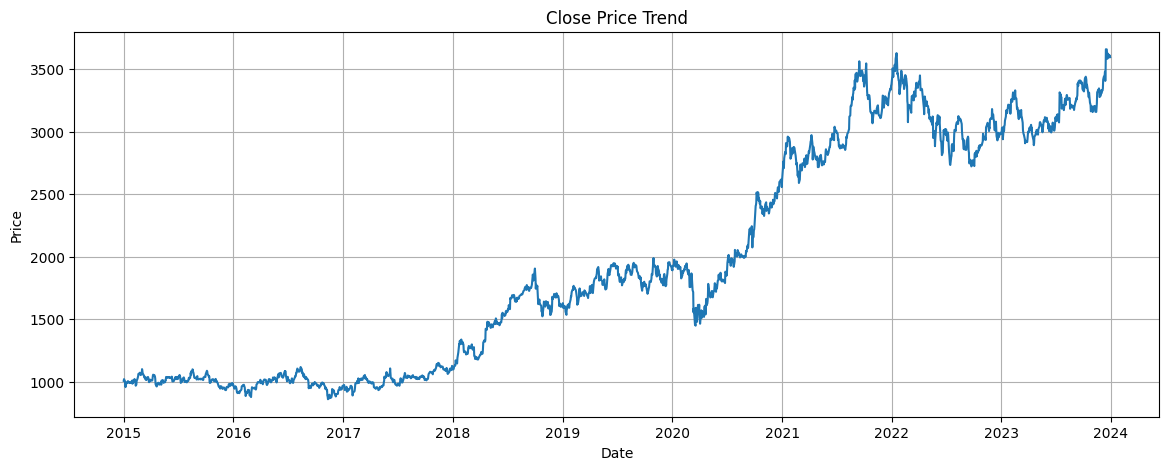

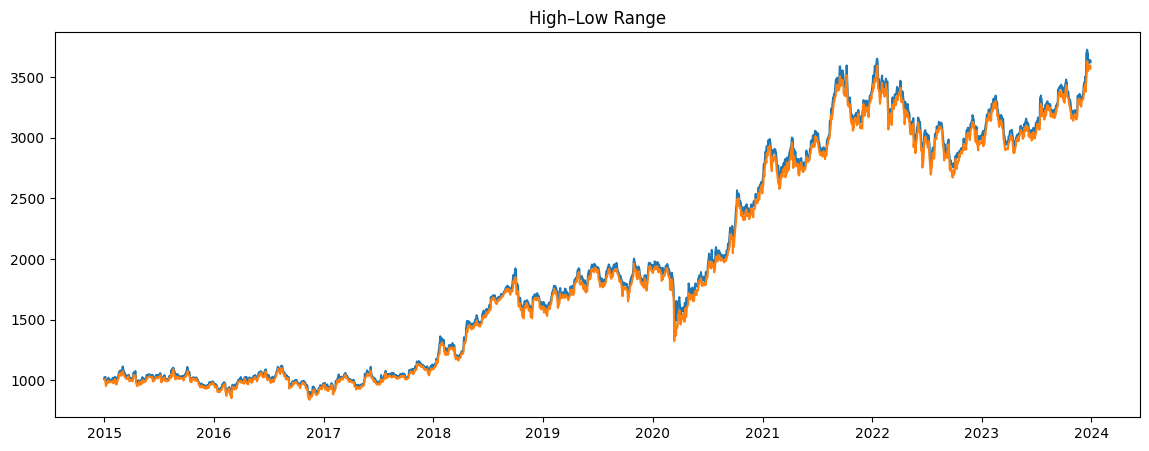

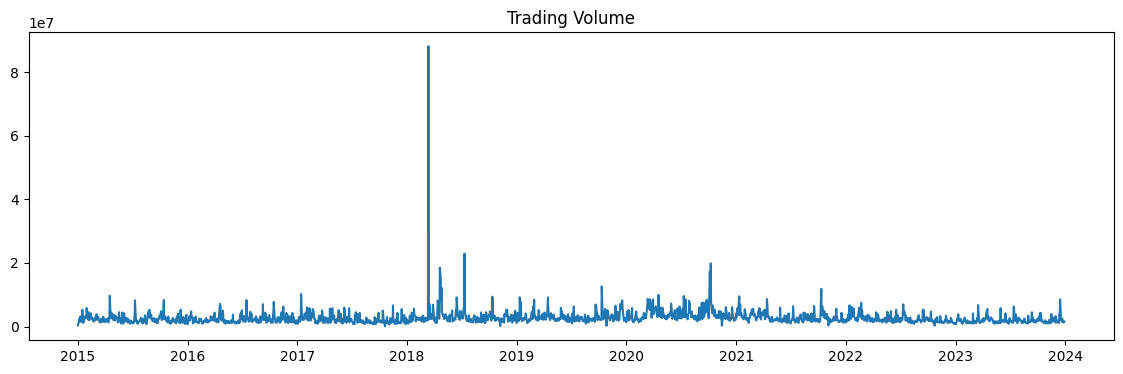

/tmp/ipython-input-3178977361.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df['Volume'].resample('M').sum()


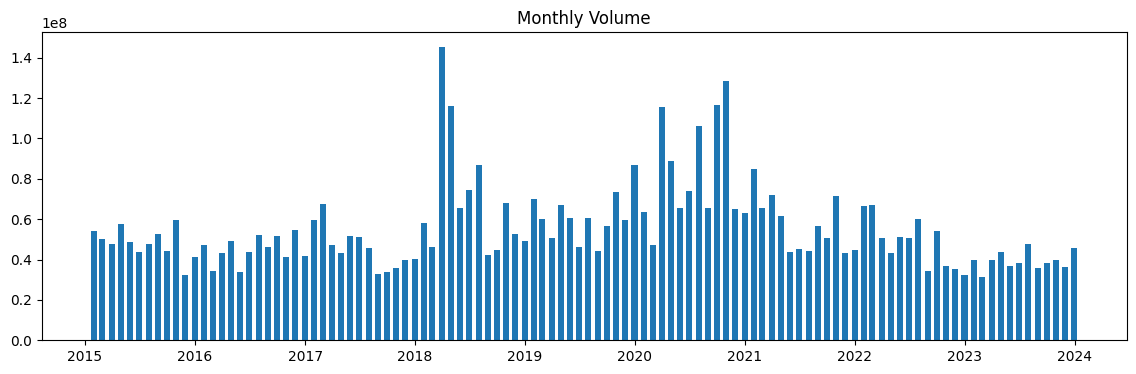

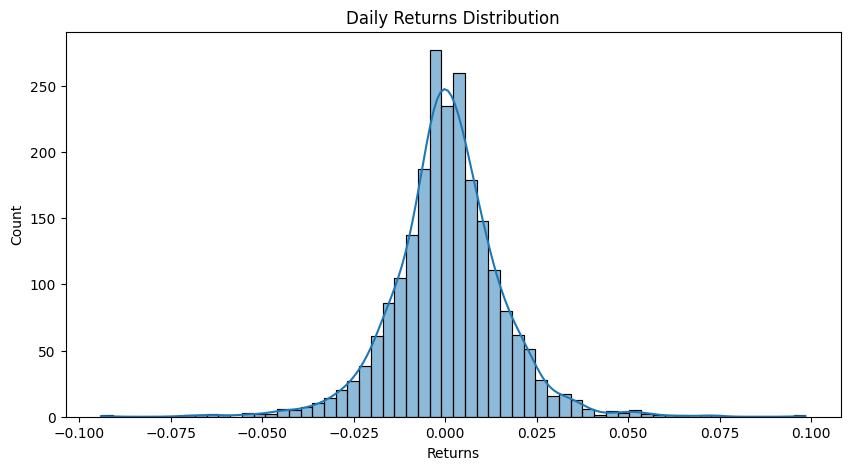

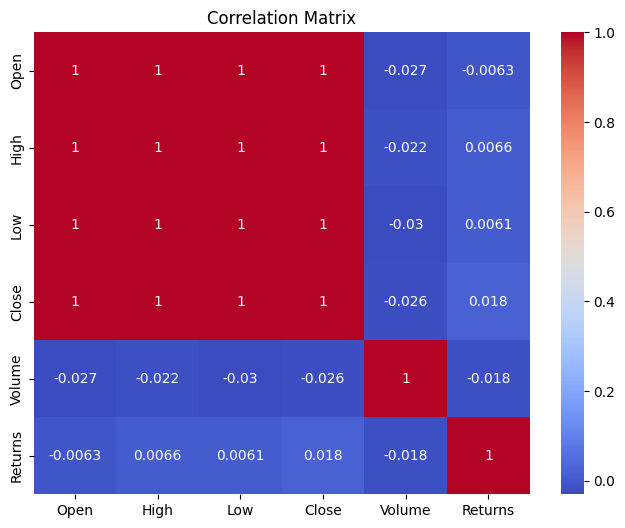

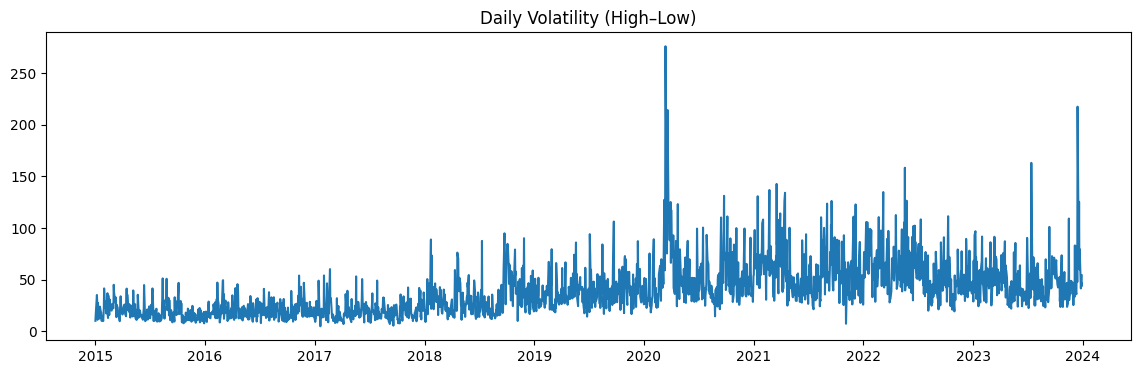

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df.columns = [c[0] for c in df.columns]
df = df.copy()
df.index = pd.to_datetime(df.index)
df = df.sort_index()

for c in ['Open','High','Low','Close','Volume']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.dropna()

display(df.describe())

plt.figure(figsize=(14,5))
plt.plot(df.index, df['Close'])
plt.title("Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(df.index, df['High'])
plt.plot(df.index, df['Low'])
plt.fill_between(df.index, df['Low'], df['High'], alpha=0.2)
plt.title("High–Low Range")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df.index, df['Volume'])
plt.title("Trading Volume")
plt.show()

monthly_volume = df['Volume'].resample('M').sum()
plt.figure(figsize=(14,4))
plt.bar(monthly_volume.index, monthly_volume.values, width=20)
plt.title("Monthly Volume")
plt.show()

df['Returns'] = df['Close'].pct_change()

plt.figure(figsize=(10,5))
sns.histplot(df['Returns'].dropna(), bins=60, kde=True)
plt.title("Daily Returns Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Volume','Returns']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

df['Range'] = df['High'] - df['Low']

plt.figure(figsize=(14,4))
plt.plot(df.index, df['Range'])
plt.title("Daily Volatility (High–Low)")
plt.show()

fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.update_layout(title="Candlestick View", height=600)
fig.show()

STEP 4:- Featured engineering (Technical indicators)

In [ ]:
import pandas as pd
df['Price_Change'] =df['Close'] - df['Open']
df['High_Low_Range'] = df['High'] -df['Low']
df['Return']= df['Close'].pct_change()
df['MA10'] = df['Close'].rolling(10).mean()
df['MA20'] = df['Close'].rolling(20).mean()
df['EMA10']= df['Close'].ewm(span=10, adjust=False).mean()
df['EMA20'] =df['Close'].ewm(span=20, adjust=False).mean()
df['Volatility'] = df['Return'].rolling(14).std()
delta= df['Close'].diff()
gain=delta.clip(lower=0).rolling(14).mean()
loss=(-delta.clip(upper=0)).rolling(14).mean()
rs=gain/loss
df['RSI']=100-(100/(1+rs))
df=df.dropna()
df.head()

,Open,High,Low,Close,Volume,Returns,Range,Price_Change,High_Low_Range,Return,MA10,MA20,EMA10,EMA20,Volatility,RSI
Date,,,,,,,,,,,,,,,,
2015-01-29,1005.879109,1018.046343,995.931251,1008.514648,3734392,0.001989,22.115092,2.635539,22.115092,0.001989,997.349078,993.395056,997.739598,996.925753,0.009549,72.788771
2015-01-30,1014.875643,1020.543145,978.928764,983.704529,5817402,-0.024601,41.614381,-31.171114,41.614381,-0.024601,995.288995,992.237451,995.187767,995.666589,0.009327,44.422894
2015-02-02,983.684506,999.319601,975.777795,996.446228,3181802,0.012953,23.541806,12.761722,23.541806,0.012953,994.778033,991.046506,995.416578,995.740840,0.010011,51.859499
2015-02-03,995.436125,1016.580240,993.632912,1013.905029,2345054,0.017521,22.947328,18.468904,22.947328,0.017521,996.849457,991.503751,998.778115,997.470763,0.010878,61.341861
2015-02-04,1017.768723,1019.235115,991.650787,996.485962,2245418,-0.017180,27.584328,-21.282761,27.584328,-0.017180,997.596252,992.942142,998.361360,997.376972,0.011739,49.575763



STEP 5:- Machine Learning Model 1 (Classification)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df['Target']=(df['Close'].shift(-1) > df['Close']).astype(int)
df =df.dropna()
features=['Open','High','Low','Close','Volume','Price_Change','High_Low_Range',
            'Return','MA10','MA20','EMA10','EMA20','Volatility','RSI']
X=df[features]
y=df ['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy: 0.49206349206349204
              precision    recall  f1-score   support

           0       0.48      0.28      0.35       218
           1       0.50      0.70      0.58       223

    accuracy                           0.49       441
   macro avg       0.49      0.49      0.47       441
weighted avg       0.49      0.49      0.47       441



STEP 5:-Machine Learning Model 2 (Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df['Future_Close'] = df['Close'].shift(-1)
df = df.dropna()

X =df[features]
y= df['Future_Close']

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

reg =LinearRegression()
reg.fit(X_train, y_train)

pred =reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))

MSE: 1569.61709794804
R2 Score: 0.954675808235846


STEP 6:-Trading Strategy & Backtesting

<Axes: xlabel='Date'>

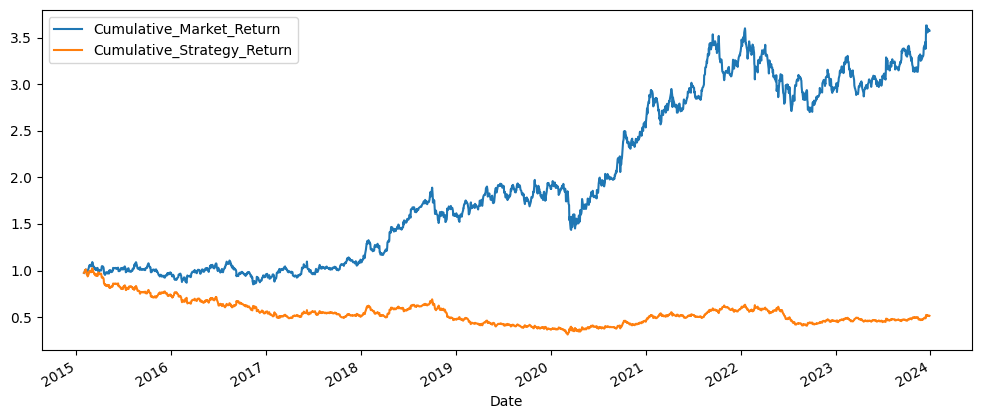

In [ ]:
df['Signal'] = 0
df.loc[df['MA10']> df['MA20'], 'Signal'] = 1
df.loc[df['MA10'] <df['MA20'], 'Signal'] = -1
df['Market_Return']= df['Close'].pct_change()
df['Strategy_Return'] =df['Signal'].shift(1) * df['Market_Return']
df = df.dropna()
df['Cumulative_Market_Return'] =(1 + df['Market_Return']).cumprod()
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()
df[['Cumulative_Market_Return','Cumulative_Strategy_Return']].plot(figsize=(12,5))

In [ ]:
number_of_trades =df['Signal'].diff().abs().sum()
print("Number of trades:", number_of_trades)
wins=df[df['Strategy_Return'] > 0].shape[0]
total_trades= df[df['Strategy_Return'] != 0].shape[0]
win_ratio = wins / total_trades
print("Win Ratio:", win_ratio)
accuracy =wins / total_trades
print("Accuracy:", accuracy)
total_profit= df['Cumulative_Strategy_Return'].iloc[-1] - 1
print("Total Profit/Loss:", total_profit)
rolling_max =df['Cumulative_Strategy_Return'].cummax()
drawdown= (df['Cumulative_Strategy_Return'] - rolling_max) / rolling_max
max_drawdown= drawdown.min()
print("Maximum Drawdown:", max_drawdown)

Number of trades: 248.0
Win Ratio: 0.4920345926263086
Accuracy: 0.4920345926263086
Total Profit/Loss: -0.4851297304552844
Maximum Drawdown: -0.6940066285132825
